In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import re

# Setup
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load processed BOA reviews
df = pd.read_csv('../data/processed/boa_reviews.csv')
df['date'] = pd.to_datetime(df['date'])  # ensure datetime
df.head()


[nltk_data] Downloading package stopwords to /home/smuca/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,rating,date,bank,source
0,"Hello, I’m facing a problem with the BOA Mobil...",1,2025-06-03,Bank of Abyssinia,Google Play
1,BoA Mobile good bank,5,2025-06-02,Bank of Abyssinia,Google Play
2,this is worest app 24/7 loading,1,2025-06-01,Bank of Abyssinia,Google Play
3,This App is not interest for Android phone Ple...,1,2025-06-01,Bank of Abyssinia,Google Play
4,BoA system is confartable,5,2025-06-01,Bank of Abyssinia,Google Play


Total reviews: 366
Date range: 2024-05-13 to 2025-06-03
Average rating: 2.47


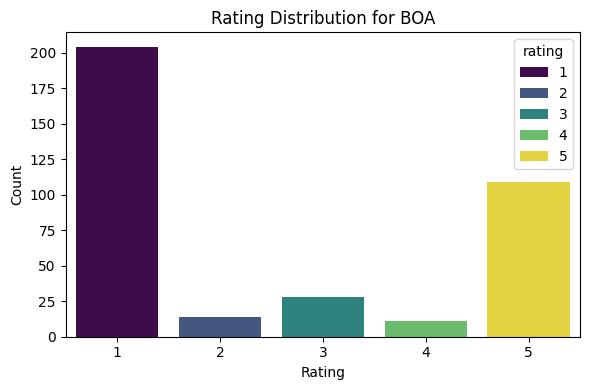

In [3]:
print("Total reviews:", len(df))
print("Date range:", df['date'].min().date(), "to", df['date'].max().date())
print("Average rating:", round(df['rating'].mean(), 2))

# Rating distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='rating', palette='viridis', hue='rating')
plt.title('Rating Distribution for BOA')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


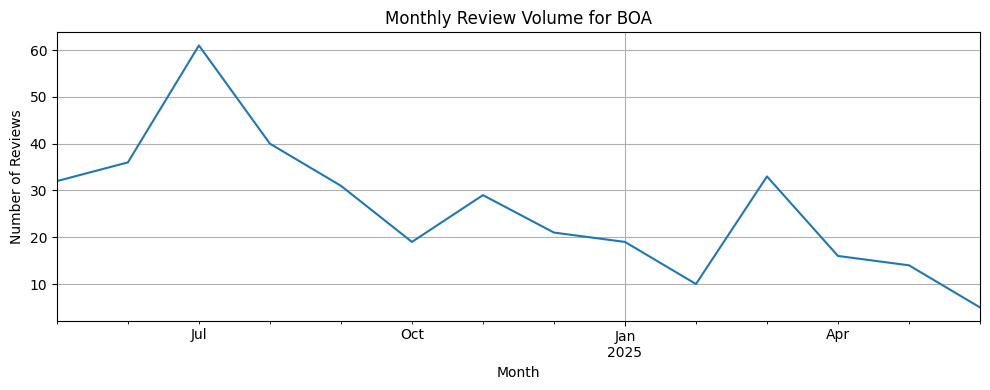

In [4]:
# Reviews per month
df_monthly = df.resample('ME', on='date').size()

plt.figure(figsize=(10,4))
df_monthly.plot()
plt.title('Monthly Review Volume for BOA')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.tight_layout()
plt.show()


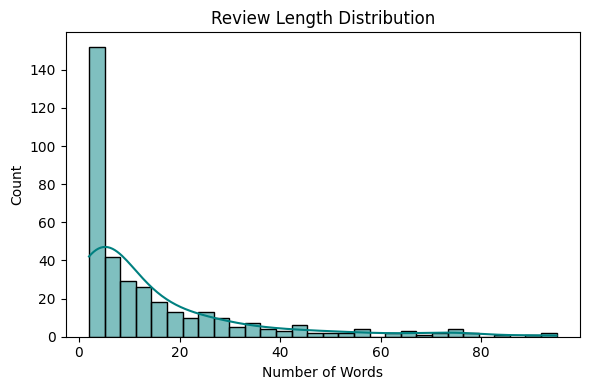

In [5]:
df['review_length'] = df['review'].apply(lambda x: len(str(x).split()))

# Review length distribution
plt.figure(figsize=(6,4))
sns.histplot(df['review_length'], bins=30, kde=True, color='teal')
plt.title('Review Length Distribution')
plt.xlabel('Number of Words')
plt.tight_layout()
plt.show()


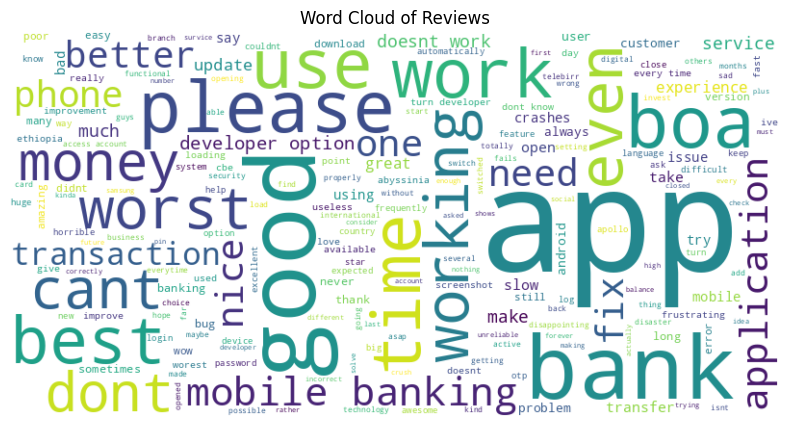

In [5]:
def preprocess_text(text):
    text = re.sub(r'[^A-Za-z\s]', '', str(text).lower())  # remove non-letters
    tokens = text.split()
    tokens = [w for w in tokens if w not in stop_words and len(w) > 2]
    return ' '.join(tokens)

all_text = ' '.join(df['review'].dropna().map(preprocess_text))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()
